**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: KEVIN BALDERAS SÁNCHEZ
*   MATRÍCULA: A01795149

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
os.chdir(DIR)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [32]:
print('Las columnas numéricas son: person_age, person_income, person_emp_length, loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length')
print()
print('Las columnas cualitativas son: person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file')
print()

Las columnas numéricas son: person_age, person_income, person_emp_length, loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length

Las columnas cualitativas son: person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file



 2. Determina el porcentaje de valores faltantes por columna.

In [33]:
print(df.isnull().sum())
print()
print('Como vemos, las columnas con valores faltantes son person_emp_length y loan_int_rate')
print()
print(df.isnull().sum()[df.isnull().sum() > 0])

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Como vemos, las columnas con valores faltantes son person_emp_length y loan_int_rate

person_emp_length     895
loan_int_rate        3116
dtype: int64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 
   
**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

In [34]:
#4.-Obteniendo la media y mediana de las variables numéricas
print('Primero se presenta la media de las variables numéricas')
print(df.mean())
print()
print('Luego , la mediana de las variables numéricas :')
print()
print(df.median())

Primero se presenta la media de las variables numericas
person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

Luego , la mediana de las variables numericas :

person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64


In [35]:
#5.-Luego también pudimos haber obtenido la información, usando describe
df.describe().iloc[[2,3,4,5,6,7]]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
std,6.348078,6.198312e+04,4.14263,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.00000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [36]:
#6.-Ahora, para la asimetría y kurtosis
print('Primero se obtiene la asimetría de cada variable numérica')
print(df.skew())
print()
print('Luego, la kurtosis de cada variable numérica')
print(df.kurtosis())

Primero se obtiene la asimetría de cada variable numerica
person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

Luego, la kurtosis de cada variable numerica
person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64


In [37]:
#7.-Después, clasificamos los resultados del punto anterior de acuerdo a su asimetría y kurtosis
df_person_age_loaninrate = df[["person_age","loan_int_rate"]]

person_age_kurt = df_person_age_loaninrate["person_age"].kurtosis()
loan_int_rate_kurt = df_person_age_loaninrate["loan_int_rate"].kurtosis()

person_age_asim = df_person_age_loaninrate["person_age"].skew()
loan_int_rate_asim = df_person_age_loaninrate["loan_int_rate"].skew()

print('-------------KURTOSIS---------------')
print("Como la kurtosis de person_age es {:.3f}, es de tipo Leptocurtica, pues su valor es > 3".format(person_age_kurt))
print("Como la kurtosis de loan_int_rate es {:.3f}, es de tipo Platicurtica, pues su valor es < 0".format(loan_int_rate_kurt))

print('-------------ASIMETRÍA---------------')
print("Para clasificar la asimetría recordemos la moda, mediana y media de person_age:")
print("Media:{:.3f}, Moda: {} y Mediana:{}".format(df["person_age"].mean(),df["person_age"].mode()[0],df["person_age"].median()))
print("Como tenemos la relación Moda<Mediana<Media, se puede decir que es de tipo positiva")
print()
print("Para clasificar la asimetría recordemos la moda, mediana y media de loan_int_rate:")
print("Media:{:.3f}, Moda: {} y Mediana:{}".format(df["loan_int_rate"].mean(),df["loan_int_rate"].mode()[0],df["loan_int_rate"].median()))
print("Como tenemos la relación Moda<Mediana<Media, se puede decir que es de tipo positiva")


-------------KURTOSIS---------------
Como la kurtosis de person_age es 18.561, es de tipo Leptocurtica, pues su valor es > 3
Como la kurtosis de loan_int_rate es -0.672, es de tipo Platicurtica, pues su valor es < 0
-------------ASIMETRÍA---------------
Para clasificar la asimetría recordemos la moda, mediana y media de person_age:
Media:27.735, Moda: 23 y Mediana:26.0
Como tenemos la relación Moda<Mediana<Media, se puede decir que es de tipo positiva

Para clasificar la asimetría recordemos la moda, mediana y media de loan_int_rate:
Media:11.012, Moda: 7.51 y Mediana:10.99
Como tenemos la relación Moda<Mediana<Media, se puede decir que es de tipo positiva


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

Observamos que para los campos person_age y  loan_int_rate sí se cumple la parte de la asimetría

Puesto que tenemos colas alargadas a la derecha, se relaciona con valores positivos de la asimetría
Asi mismo cabe resaltar que loan_int_rate esta muy cerca de tener simetría casi 0, pues los valores de moda
mediana y media estan muy cerca de ellos, pero no son lo mismo, por lo que no tiene simetría cero, pero casi
Después, del histograma para la variable person_income y loan_status, tenemos dos barras en cada variable

En el caso de loan_status, es debido a que si bien tenemos valores numéricos, estos son 0 y 1
Y para el person_income, debido a que los valores se encuentran principalmente en el rango de 0 - 0.5e6
Habría que examinar si cambiando la escala del eje, cambia el historgrama de person_income

De ahi en fuera, observamos que todas las demás gráficas tienen cola alargada a la derecha, es decir, en ninguna columna
Se asocia una asimetría negativa o cola alargada a la izquierda


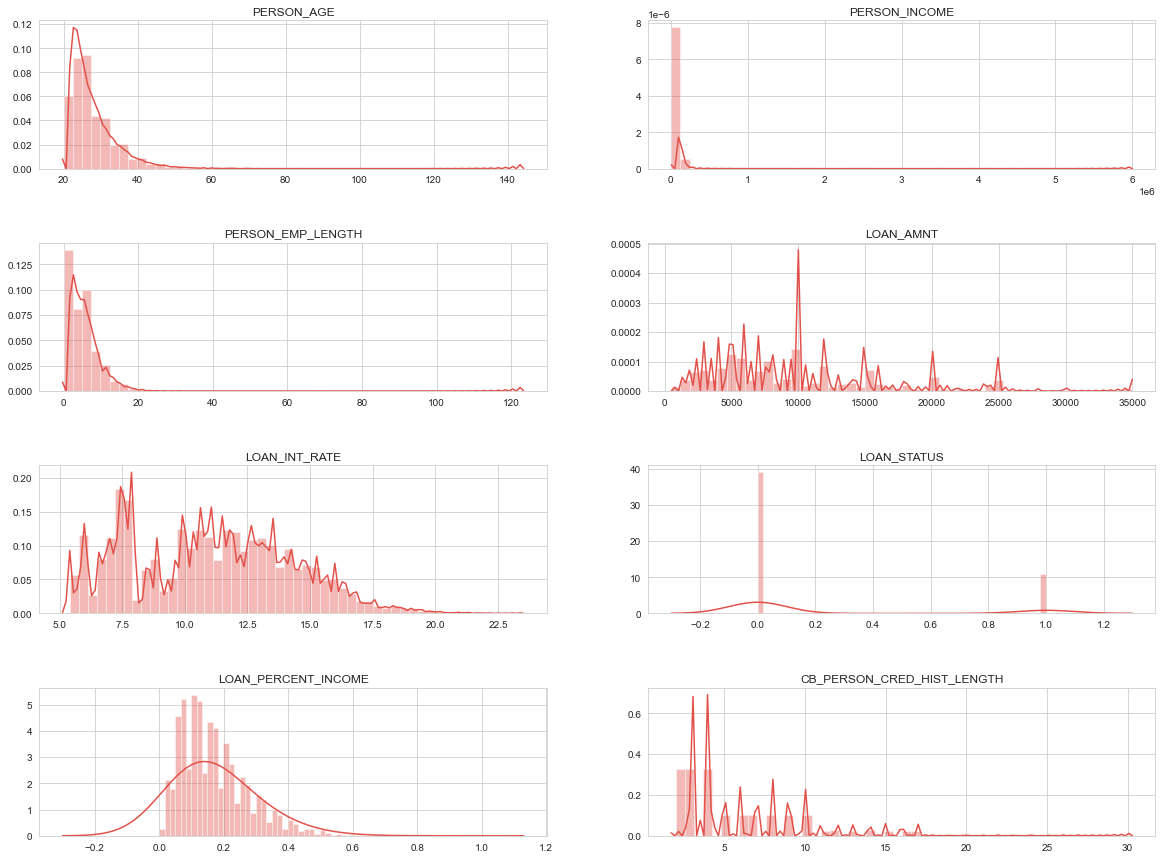

In [75]:
print('Observamos que para los campos person_age y  loan_int_rate sí se cumple la parte de la asimetría')
print()
print('Puesto que tenemos colas alargadas a la derecha, se relaciona con valores positivos de la asimetría')
print('Asi mismo cabe resaltar que loan_int_rate esta muy cerca de tener simetría casi 0, pues los valores de moda')
print('mediana y media estan muy cerca de ellos, pero no son lo mismo, por lo que no tiene simetría cero, pero casi')
print('Después, del histograma para la variable person_income y loan_status, tenemos dos barras en cada variable')
print()
print('En el caso de loan_status, es debido a que si bien tenemos valores numéricos, estos son 0 y 1')
print('Y para el person_income, debido a que los valores se encuentran principalmente en el rango de 0 - 0.5e6')
print('Habría que examinar si cambiando la escala del eje, cambia el historgrama de person_income')
print()
print('De ahi en fuera, observamos que todas las demás gráficas tienen cola alargada a la derecha, es decir, en ninguna columna')
print('Se asocia una asimetría negativa o cola alargada a la izquierda')
sns.set_style("whitegrid")
sns.set_palette("Spectral")

# Define subplot grid
cols_names = list(df.describe().columns)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

# loop through columns and axes
for variable, ax in zip(cols_names, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(df[variable], ax=ax,kde_kws={'bw': 0.1})
    #df[variable].plot.hist(bins=50,ax=ax)
    # chart formatting
    ax.set_title(variable.upper())
    ax.set_xlabel("")



5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles. 

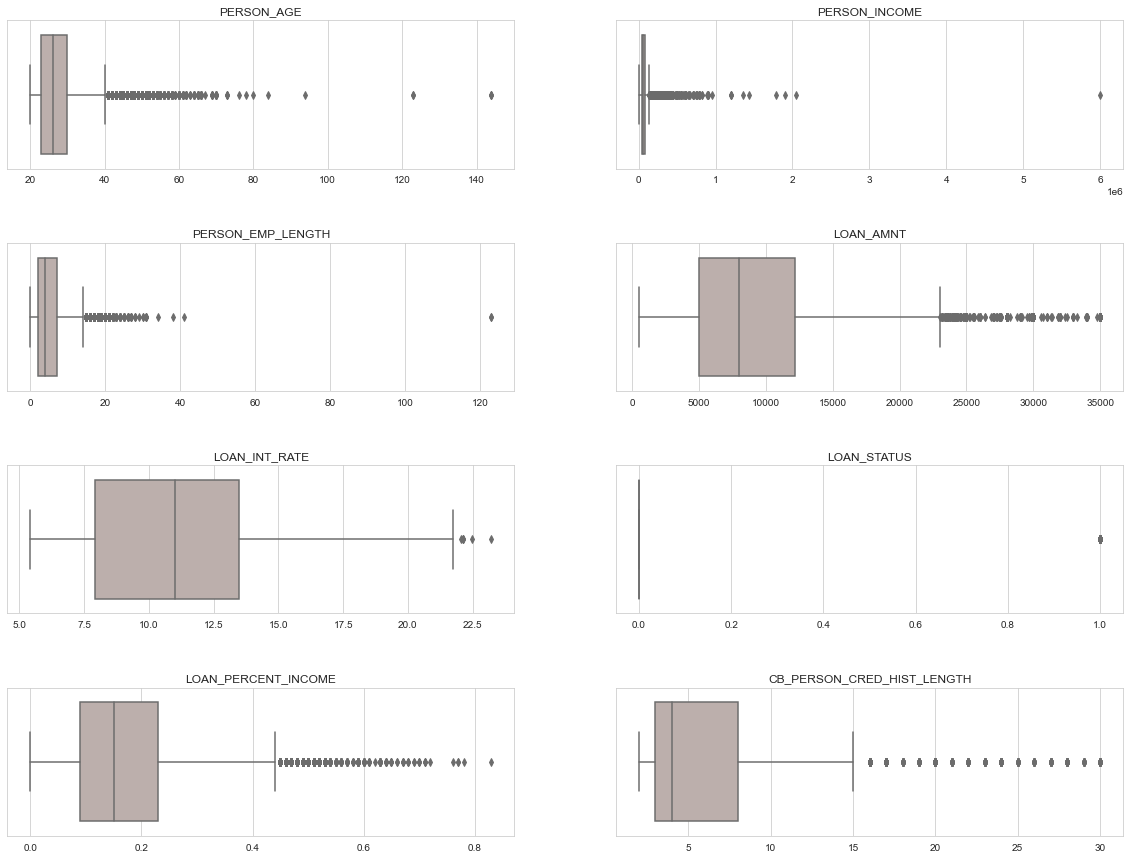

Vemos que las boxplots de person_income, loan_status refuerzan nuestra idea del inciso anterior
Donde el person_income, tiene la mayor parte distribuida en rango [0-0.3e6], pero eso no quita que tenga ourliers hasta de 6e6
Entonces aún acercandonos a esa escala, no podríamos ver que tiene ourliers mucho más adelante; es decir
En esta muestra, muchas personas tienen ingresos que no superan los 0.5e6
Por otro lado, para el loan_status, como sólo tiene valores de 0 o 1, pues los puntos se concentran ahí
Permitiendo que no se visualice una caja como tal


In [76]:
sns.set_palette("terrain_r", 7)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

for variable, ax in zip(cols_names, axs.ravel()):
    sns.boxplot(x=variable,data=df,ax=ax)
    ax.set_title(variable.upper())
    ax.set_xlabel("")
plt.show()
print('Vemos que las boxplots de person_income, loan_status refuerzan nuestra idea del inciso anterior')
print('Donde el person_income, tiene la mayor parte distribuida en rango [0-0.3e6], pero eso no quita que tenga ourliers hasta de 6e6')
print('Entonces aún acercandonos a esa escala, no podríamos ver que tiene ourliers mucho más adelante; es decir')
print('En esta muestra, muchas personas tienen ingresos que no superan los 0.5e6')
print('Por otro lado, para el loan_status, como sólo tiene valores de 0 o 1, pues los puntos se concentran ahí')
print('Permitiendo que no se visualice una caja como tal')


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [43]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [44]:
print('Primero, encontramos la moda de cada variable categórica:')
mode_df = df[["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]].mode()
mode_df.rename(index={0:'Moda'})

Primero, encontramos la moda de cada variable categórica:


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
Moda,RENT,EDUCATION,A,N


In [45]:
print('Luego para la cantidad de valores únicos, tenemos el renglón nombrado como unique\n')
print(df.describe(include='object'))
print()
print('Cabe resaltar, que la funcion describe nos confirma la información de la moda, dado el inciso anterior')

Luego para la cantidad de valores únicos, tenemos el renglón nombrado como unique

       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

Cabe resaltar, que la funcion describe nos confirma la información de la moda, dado el inciso anterior


In [46]:
print('Aquí mostramos los recuentos únicos para la columna person_home_ownership')
df["person_home_ownership"].value_counts()

Aquí mostramos los recuentos únicos para la columna person_home_ownership


RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [47]:
print('Aquí mostramos los recuentos únicos para la columna loan_intent')
df["loan_intent"].value_counts()

Aquí mostramos los recuentos únicos para la columna loan_intent


EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [48]:
print('Aquí mostramos los recuentos únicos para la columna loan_grade')
df["loan_grade"].value_counts()

Aquí mostramos los recuentos únicos para la columna loan_grade


A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [49]:
print('Aquí mostramos los recuentos únicos para la columna cb_person_default_on_fire')
df["cb_person_default_on_file"].value_counts()

Aquí mostramos los recuentos únicos para la columna cb_person_default_on_fire


N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

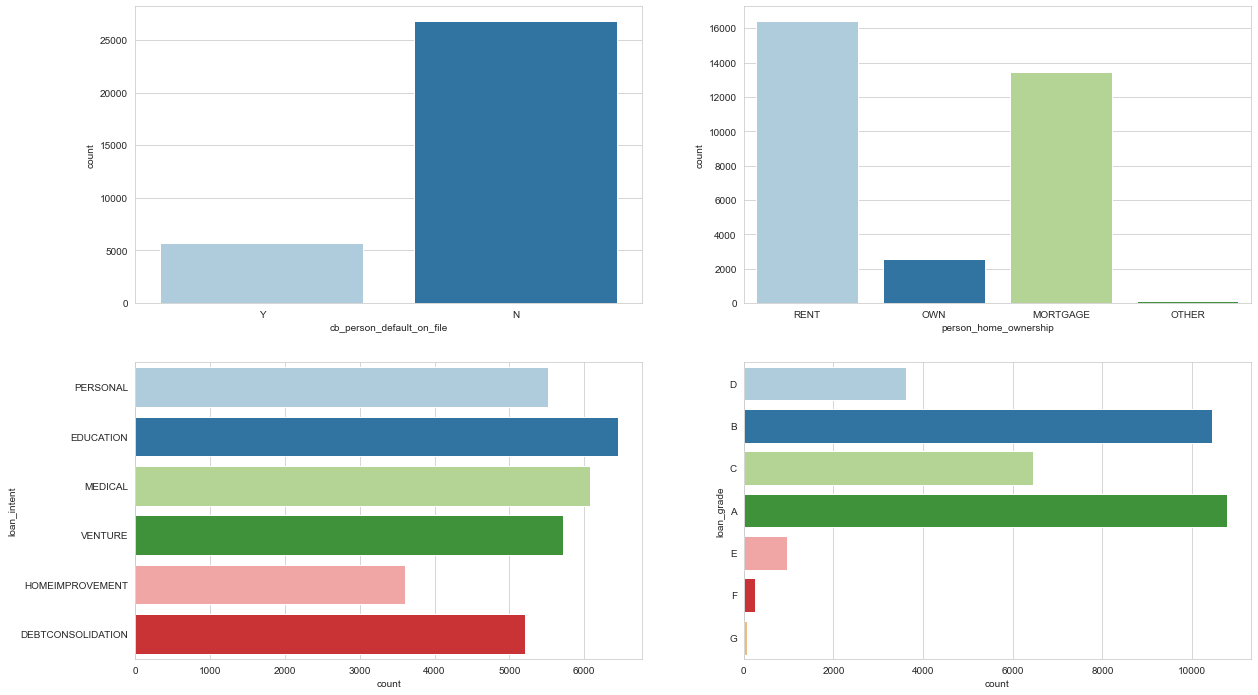

In [50]:
sns.set_palette("Paired")
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
sns.countplot(x='cb_person_default_on_file',data=df, ax=ax[0,0])
sns.countplot(y='loan_grade',data=df, ax=ax[1,1])
sns.countplot(y='loan_intent',data=df,ax=ax[1,0])
sns.countplot(x='person_home_ownership',data=df,ax=ax[0,1])
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.	

El loan_status con categoria 0, indica presencia de más outliers en su distribución

El loan_status con categoria 1, indica datos con menor desviación en su distribución

El loan_status con categoria 1 indican mayor porcentaje de income tanto en su promedio, como en mediana

El loan_status con categoria 0 indica en su IQR que su porcentaje de income fue aproximadamente < 20%



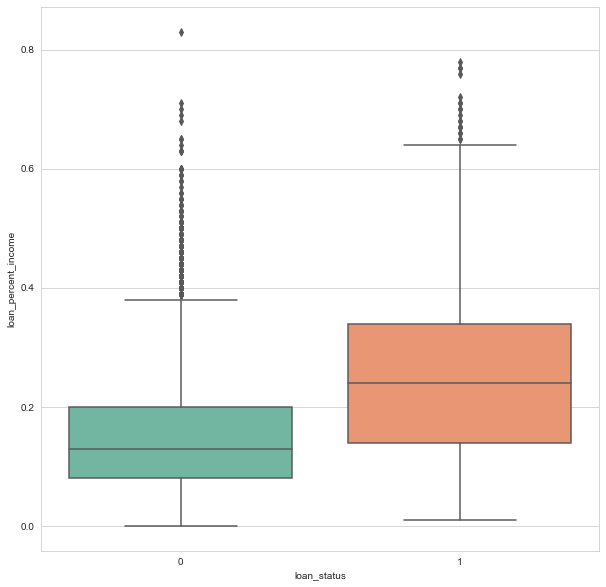

In [51]:
sns.set_palette("Set2")
fig = plt.figure(figsize=(10,10))
sns.boxplot(y="loan_percent_income",x="loan_status",data=df)
print('El loan_status con categoria 0, indica presencia de más outliers en su distribución\n')
print('El loan_status con categoria 1, indica datos con menor desviación en su distribución\n')
print('El loan_status con categoria 1 indican mayor porcentaje de income tanto en su promedio, como en mediana\n')
print('El loan_status con categoria 0 indica en su IQR que su porcentaje de income fue aproximadamente < 20%\n')

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

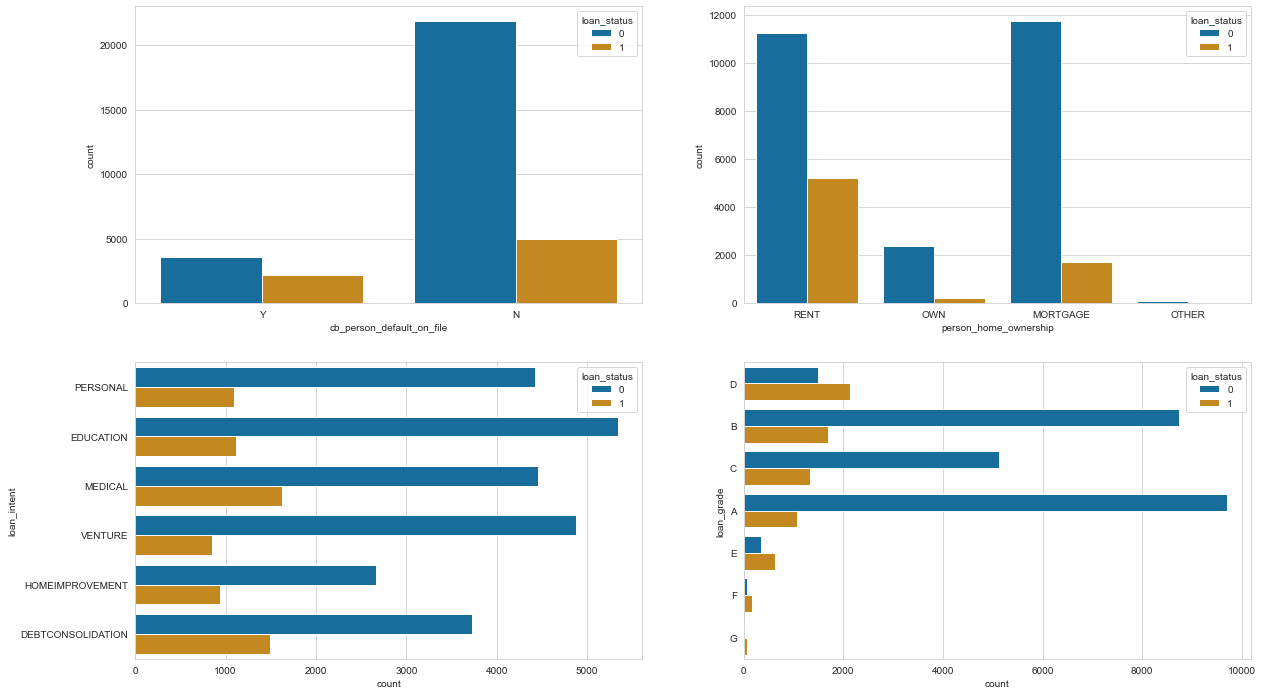

In [52]:
sns.set_palette("colorblind")
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
sns.countplot(x='cb_person_default_on_file',hue='loan_status',data=df, ax=ax[0,0])
sns.countplot(y='loan_grade',hue='loan_status',data=df, ax=ax[1,1])
sns.countplot(y='loan_intent',hue='loan_status',data=df,ax=ax[1,0])
sns.countplot(x='person_home_ownership',hue='loan_status',data=df,ax=ax[0,1])
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<AxesSubplot:>

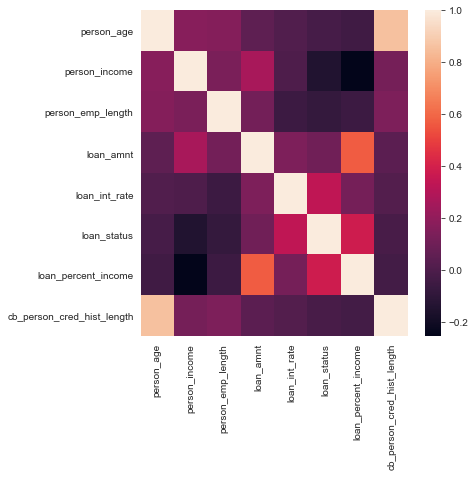

In [53]:
#10.- Heatmap de correlación de todas las variables
fig = plt.figure(figsize=(6,6))
correlation = df.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

In [54]:
#11- A juzgar por la escala y el color del mapa de color, 
# la variable que está mayormente correlacionada con loan_status es : 
# loan_int_rate y loan_percent_income

print('Con el cálculo de abajo, vemos que con un porcentaje de 0.37,') 
print('loan_percent_income está más correlacionada con loan_status')
print('Seguido de la variable loan_int_rate, con un valor de 0.33')
print()
print(df.corr(method='pearson').iloc[-3])


Con el cálculo de abajo, vemos que con un porcentaje de 0.37,
loan_percent_income está más correlacionada con loan_status
Seguido de la variable loan_int_rate, con un valor de 0.33

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
Name: loan_status, dtype: float64
